# Projet Hadoop

In [22]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from colorama import Fore, Back, Style

## Partie 1 : Préparation des données

In [13]:
# Créer la session Spark
spark = SparkSession.builder \
    .appName("EcoMonitor") \
    .master("local[*]") \
    .config("spark.driver.host", "localhost") \
    .getOrCreate()

# Charger les données
df = spark.read.csv("pa/file.csv", header=True, inferSchema=True)
df = df.toPandas()

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

## Partie 2 : Analyse des données

*Informations sur le dataset*

In [7]:
print(df.head())

              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
0             Good     

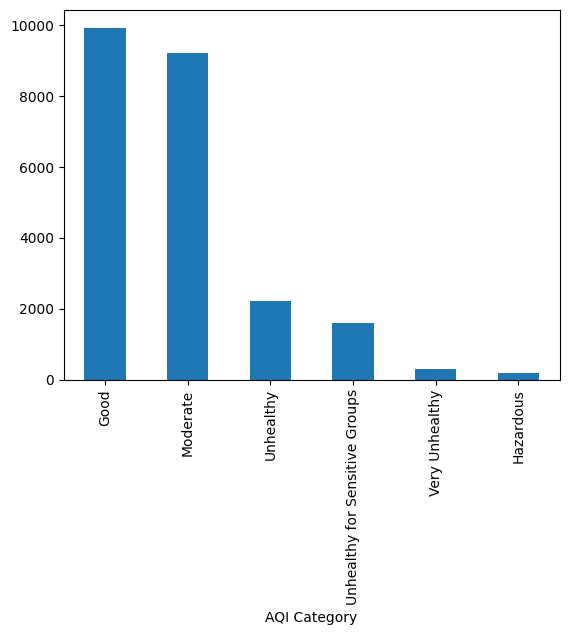

In [20]:
df["AQI Category"].value_counts().plot(kind='bar')
plt.show()

*Corrélation entre les données*

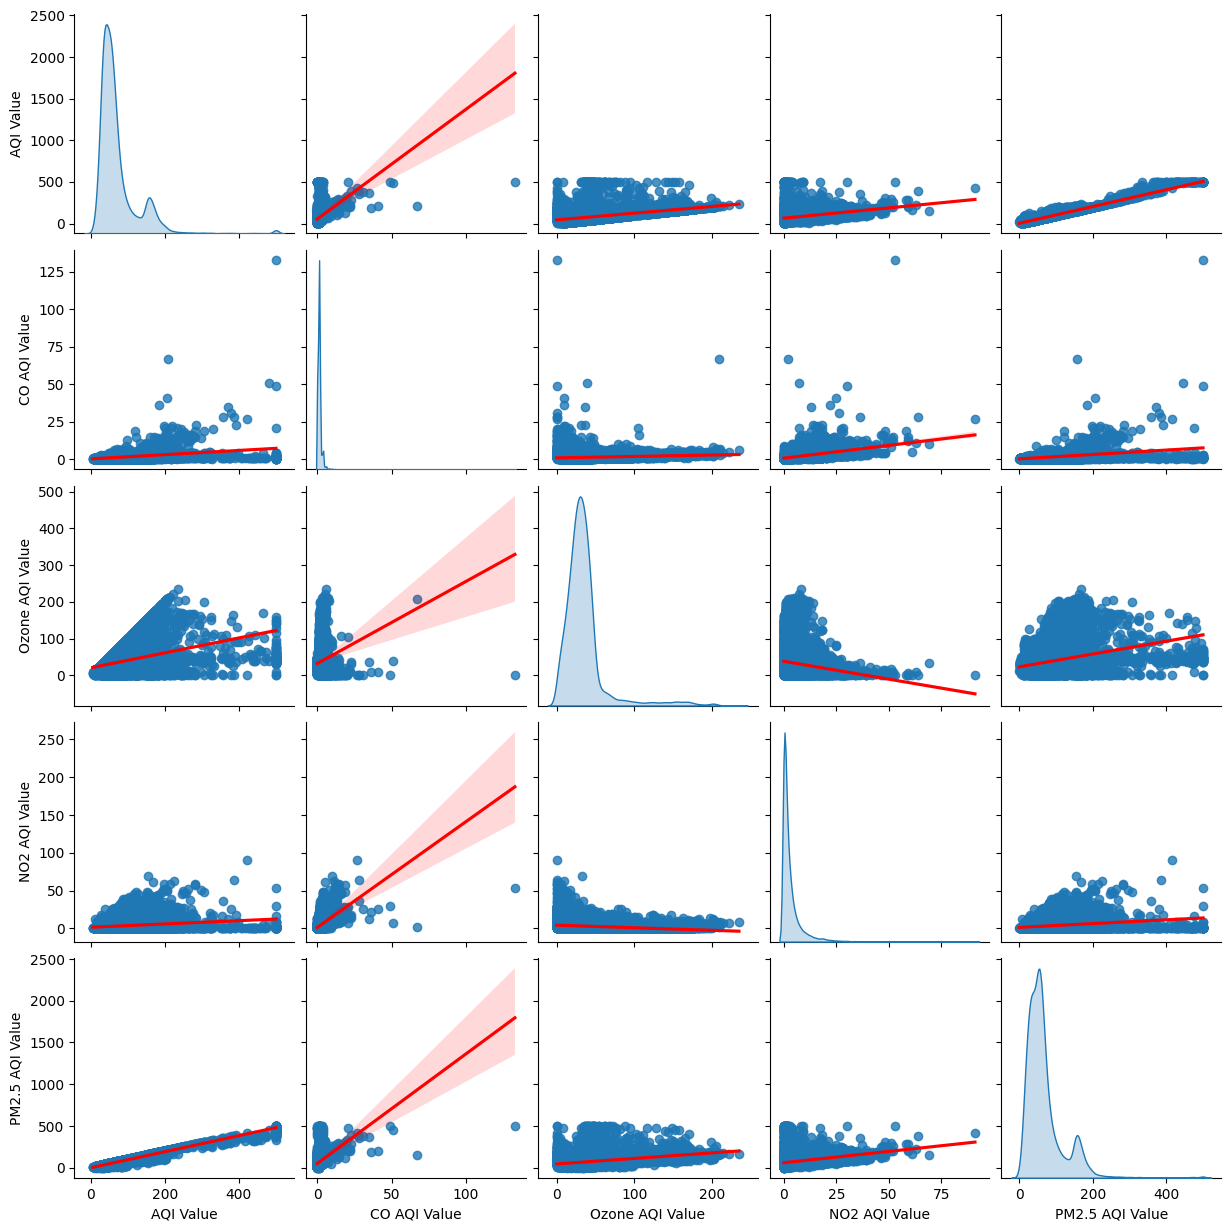

In [19]:
sns.pairplot(df, kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}})

`Pays contenant les villes qui ont une qualité de l'air maximal`

In [28]:
maxm=df[df['AQI Value']==df['AQI Value'].max()] 
maxm['Country'].value_counts() 
print(f"{maxm['Country'].value_counts()}")

Country
India                       95
Pakistan                     5
United States of America     1
South Africa                 1
Russian Federation           1
Name: count, dtype: int64


`les pays qui ont une bonne qualité de l'air`

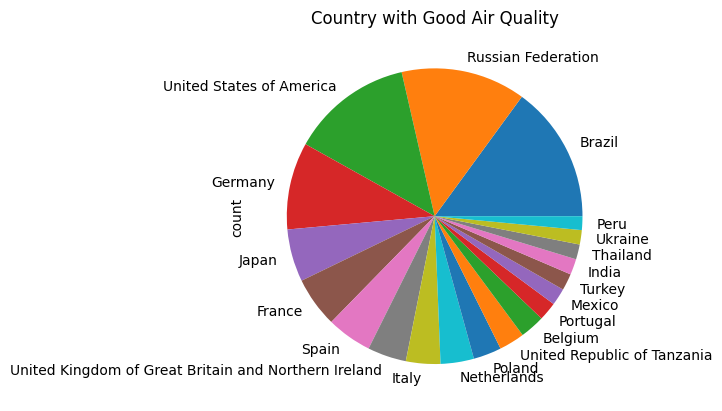

In [32]:
good_AQI_Country=df[df['AQI Value'] <=50]

good_AQI_Country['Country'].value_counts().head(20).plot.pie()
plt.title('Country with Good Air Quality')
plt.show()

`Moyenne par ville de chaque AQI`

In [33]:
world=df.groupby(by=['Country']).mean(numeric_only=True)
world=world.sort_values(by=['AQI Value']) # trier les pays par AQI Value
print(f"{world['AQI Value'].tail(10)}")

Country
Senegal                 152.424242
India                   152.964228
Qatar                   157.500000
Kuwait                  162.000000
Aruba                   163.000000
United Arab Emirates    163.666667
Pakistan                178.788274
Mauritania              179.000000
Bahrain                 188.000000
Republic of Korea       421.000000
Name: AQI Value, dtype: float64
